# Project: Data Wrangling - [WeRateDogs Twitter Data]

By: Mayowa Shobande

## Introduction

The dataset to be wrangled (analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

Real-world data rarely comes clean. Using Python and its libraries, the data for this project will be gathered from variety of sources and in a variety of formats, assessed for quality and tidiness, then cleaned.

## Project Steps Overview


Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

        data wrangling efforts
        data analyses and visualizations

## Gathering Data

#### Importing libraries

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import tweepy 
from tweepy import Cursor
import requests
from bs4 import BeautifulSoup
import json
import io
import warnings
warnings.filterwarnings("ignore")

Libraries are imported successfully.


#### Importing twitter_archive data 

In [2]:
# twitter_archive dataset is the firts dataset needed for this project.

twitter_archive = pd.read_csv("C:/Users/shoba/Downloads/twitter-archive-enhanced.csv")

print('Data imported successfully')

Data imported successfully


Twitter_archive data was downloaded manually.

#### Importing image_predictions data

In [3]:
# URL for image_predictions.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# using BeautifulSoup to scrap the data.

soup = BeautifulSoup(response.content,'html.parser')

In [5]:
# read the tsv file into pandas DataFrame.

image_predictions = pd.read_csv(io.StringIO(soup.decode('utf-8')),sep = '\t')

print('Image Predictions imported successfully.')

Image Predictions imported successfully.


Image_predictions was downloaded programmatically using the Requests library.

#### Importing tweet_data

In [6]:
# url for tweet_json file

urll = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
page_1 = requests.get(urll)

page_1

<Response [200]>

In [7]:
page = page_1.text

In [8]:
file = open("text.txt", 'w')
file.write(page)

10609234

In [9]:
# Reading tweet_json file

df = []
with open('text.txt', 'r') as tw_file:
    for line in tw_file.readlines():
        twe_line = json.loads(line)
        tweet_id = twe_line['id']
        tweet_text = twe_line['full_text']
        retweets = twe_line['retweet_count']
        favorites = twe_line['favorite_count']
        
        df.append({'tweet_id':tweet_id, 'tweet':tweet_text,'no_of_tweets':retweets,'no_of_favorites':favorites})
        
tweet_data = pd.DataFrame(df, columns = ['tweet_id','tweet','no_of_tweets','no_of_favorites'])

print('Data successfully imported')

Data successfully imported


Tweet_data was downloaded using Tweepy to query Twitter's API.

## Assessing Data

In this section, the imported DataFrames would be assessed for Quality issues and Tidiness issues.

#### Twitter_archive table

In [10]:
# Reading twitter_archive data.

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# Reading five random rows of twitter_archive table.

twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1714,680440374763077632,NaN,NaN,2015-12-25 17:30:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Merry Christmas. My gift to you is this tiny u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680440374...,11,10,None,None,None,None,None
122,869227993411051520,NaN,NaN,2017-05-29 16:24:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gizmo. His favorite thing is standing ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869227993...,13,10,Gizmo,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
1107,734776360183431168,NaN,NaN,2016-05-23 16:01:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Livvie. Someone should tell her it's b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734776360...,11,10,Livvie,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None


In [12]:
# Checking Non-Null and datatype of the columns in tweet_archive table.

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# Checking random dog tweets.
twitter_archive.text.sample(5)

1061    This is Theodore. He just saw an adult wearing...
2339    Oh my. Here you are seeing an Adobe Setter giv...
1427    Pls make sure ur dogs have gone through some b...
352     I couldn't make it to the #WKCDogShow BUT I ha...
2166    Here we have a Gingivitis Pumpernickel named Z...
Name: text, dtype: object

In [14]:
# checking unique values in 'text' column to get better view of the tweets.

twitter_archive.text.unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'],
      dtype=object)

In [15]:
# checking unique values in tweet column.

twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [16]:
# checking unique values in name column.

twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
# checking unique values of dog names in lower strings.

twitter_archive[twitter_archive.name.str.lower() == twitter_archive.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [18]:
# Checking unique names in doggo, floofer, pupper, puppo columns.

twitter_archive.doggo.unique(), twitter_archive.floofer.unique(), twitter_archive.pupper.unique(), twitter_archive.puppo.unique()

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [19]:
# checking unique values of rating_numerator column

twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [20]:
# checking unique values of rating_denominator column

twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [21]:
# Checking for null values in in_reply_to_status_id column

twitter_archive[twitter_archive['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [22]:
# Reading twitter_archive data.

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
# Checking descriptive statistics summary of twitter_archive table

twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Image_predictions table

In [24]:
# Display the first five rows of image_predictions table.

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
# print concise summary of image_predictions table.

image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# unique values in column p1.
image_predictions.p1.nunique

<bound method IndexOpsMixin.nunique of 0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object>

In [27]:
# checking unique values in column p2.
image_predictions.p2.nunique

<bound method IndexOpsMixin.nunique of 0                   collie
1       miniature_pinscher
2                 malinois
3                  redbone
4               Rottweiler
               ...        
2070      English_springer
2071    Labrador_retriever
2072              malamute
2073              Pekinese
2074                 bagel
Name: p2, Length: 2075, dtype: object>

In [28]:
# checking unique values in column p3
image_predictions.p3.nunique

<bound method IndexOpsMixin.nunique of 0                 Shetland_sheepdog
1               Rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          Doberman
                   ...             
2070    German_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object>

In [29]:
# Checking descriptive statistic of numerical attributes in image_predictions table.

image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Tweet_data table

In [30]:
# display the first five rows of tweet_head table.

tweet_data.head()

,tweet_id,tweet,no_of_tweets,no_of_favorites
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,This is Franklin. He would like you to stop ca...,9774,41048


In [31]:
# Display summary of tweet_data table

tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   int64 
 1   tweet            2354 non-null   object
 2   no_of_tweets     2354 non-null   int64 
 3   no_of_favorites  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [32]:
tweet_data.tweet.unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'],
      dtype=object)

In [33]:
# Display statistical summary of tweet_data DataFrame.

tweet_data.describe()

,tweet_id,no_of_tweets,no_of_favorites
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues

#### Twitter_archive table

* Null values are present in some columns.
* Timestamp not in datetime data type.
* Retweeted tweets are recorded, causing duplicate row entries.
* Details in source columns should be converted to 'Twitter for Iphone', 'Twitter web', 'Vine', 'TweetDeck'.
* Text column has different variables; ratings, url, text.
* Some columns are not properly named.
* Some columns are not needed.


#### Image_predictions table

* p1, p2, p3 not in uniform string case.
* Columns are not properly named.
* Some columns need to be dropped.


#### Tweet_data table

* Also, Tweet column has different variables; ratings, url, text.
* Columns need to be renamed



### Tidiness issues


* The three datasets should be merged in a table.
* Duplicated columns should be dropped.
* Dog stages are in four separate tables.

## Cleaning Data

In this section, the quality and tidiness issues of the assessed DataFrames would be cleaned.

In [34]:
# copies of the dataframes.

twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy() 

Copies of the three DataFrames were created.

### Twitter_archive table

### Define 

Covert timestamp data type from object to datetime.

### Code

In [35]:
# converting 'timestamp' datatype from object to datetime.

twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])

### Test

In [36]:
# checking the datatype to confirm change.

twitter_archive.timestamp.dtypes

datetime64[ns, UTC]

### Define 


Convert values in 'source' column from links to 'Twitter for Iphone', 'Twitter web', 'Vine', 'TweetDeck'.

### Code

In [37]:
# display unique values in 'source' column for change.

twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [38]:
# changing value to 'Twitter for Iphone'.
twitter_archive['source'] = twitter_archive['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for Iphone')

# changing value to 'Twitter for Web'.
twitter_archive['source'] = twitter_archive['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web')

# changing value to 'Vine'.
twitter_archive['source'] = twitter_archive['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')


# changing value to 'TweetDeck'.
twitter_archive['source'] = twitter_archive['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

### Test

In [39]:
# checking unique values in 'source' column again to confirm change.

twitter_archive.source.unique()

array(['Twitter for Iphone', 'Twitter Web', 'Vine', 'TweetDeck'],
      dtype=object)

Tweet source successfully changed to Twitter for Iphone, Twitter Web, Vine and TweetDeck.

### Test

In [40]:
# display the first five rows of twitter_archive table to confirm changes.

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for Iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for Iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for Iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for Iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define

Remove urls from 'text' column.

### Code

In [41]:
# removing url from column using lambda function.

twitter_archive['text'] = twitter_archive['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

### Test

In [42]:
# checking unique values in 'text' column to confirm change.

twitter_archive.text.unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 ",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 ',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af ',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of ',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet '],
      dtype=object)

url successfully removed.

### Define

Remove retweeted tweets causing duplicate entries and drop empty rows.

### Code

In [43]:
# drop retweeteed rows in 'retweeted_status_id' column

twitter_archive = twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

In [44]:
# drop retweeted rows in 'retweeted_status_user_id' column

twitter_archive = twitter_archive[twitter_archive['retweeted_status_user_id'].isnull()]

In [45]:
# drop retweeted rows in 'retweeted_status_tweet_time' column

twitter_archive = twitter_archive[twitter_archive['retweeted_status_timestamp'].isnull()]

### Test

In [46]:
#  display five five row of twitter_archive table to confirm change.

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for Iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for Iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for Iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for Iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [47]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Define

Rename timestamp, source, name, expanded_urls, retweeted_status_timestamp, columns.

### Code

In [48]:
# renaming columns

twitter_archive.rename(columns = {'timestamp': 'tweet_time', 'source': 'tweet_source', 'name' :'dog_name', 'expanded_urls': 'tweet_urls','retweeted_status_timestamp': 'retweeted_status_tweet_time'}, inplace = True )

### Test

In [49]:
# displaying the first five rows of twitter_archive table to confirm changes.

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_time,tweet_source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_tweet_time,tweet_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for Iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for Iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for Iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for Iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define

Drop columns not needed.

### Code

In [50]:
# dropping columns
twitter_archive.drop(twitter_archive.columns[[1,2,6,7,8]], axis = 1, inplace = True)

### Test

In [51]:
# print the five five rows of twitter_archive table

twitter_archive.head()

,tweet_id,tweet_time,tweet_source,text,tweet_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for Iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for Iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for Iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for Iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [52]:
# print 

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   tweet_time          2175 non-null   datetime64[ns, UTC]
 2   tweet_source        2175 non-null   object             
 3   text                2175 non-null   object             
 4   tweet_urls          2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   dog_name            2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Image_predictions table

### Define

Convert values in p1, p2, p3 columns to proper case.

### Code

In [53]:
# Converting values in p1 to proper case.

image_predictions['p1'] = image_predictions['p1'].str.title()

In [54]:
# Converting values in p2 to proper case.

image_predictions['p2'] = image_predictions['p2'].str.title()

In [55]:
# Converting values in p3 to proper case.

image_predictions['p3'] = image_predictions['p3'].str.title()

### Test

In [56]:
# print first five values in p1.

image_predictions.p1.head()

0    Welsh_Springer_Spaniel
1                   Redbone
2           German_Shepherd
3       Rhodesian_Ridgeback
4        Miniature_Pinscher
Name: p1, dtype: object

In [57]:
# print first five values in p2.

image_predictions.p2.head()

0                Collie
1    Miniature_Pinscher
2              Malinois
3               Redbone
4            Rottweiler
Name: p2, dtype: object

In [58]:
# print first five values in p3.

image_predictions.p3.head()

0      Shetland_Sheepdog
1    Rhodesian_Ridgeback
2             Bloodhound
3     Miniature_Pinscher
4               Doberman
Name: p3, dtype: object

In [59]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
945,704480331685040129,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,1,Samoyed,0.979206,True,Pomeranian,0.007185,True,Arctic_Fox,0.006438,False
522,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,Seat_Belt,0.790028,False,Boston_Bull,0.196307,True,French_Bulldog,0.012429,True
1679,813217897535406080,https://pbs.twimg.com/media/C0khWkVXEAI389B.jpg,1,Samoyed,0.905972,True,Pomeranian,0.048038,True,West_Highland_White_Terrier,0.035667,True
924,702321140488925184,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,3,West_Highland_White_Terrier,0.769159,True,Scotch_Terrier,0.064369,True,Old_English_Sheepdog,0.043763,True
943,704347321748819968,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,1,Teddy,0.233378,False,Feather_Boa,0.088474,False,Brittany_Spaniel,0.082917,True
347,672475084225949696,https://pbs.twimg.com/media/CVUchRHXAAE4rtp.jpg,1,Terrapin,0.879286,False,Cockroach,0.045252,False,Box_Turtle,0.016404,False
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,Labrador_Retriever,0.643690,True,American_Staffordshire_Terrier,0.102684,True,Dalmatian,0.050008,True
720,685943807276412928,https://pbs.twimg.com/ext_tw_video_thumb/68594...,1,Papillon,0.200812,True,Toy_Terrier,0.114512,True,Cardigan,0.094520,True
1292,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,Dalmatian,0.868304,True,Studio_Couch,0.059623,False,Snow_Leopard,0.013876,False
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,Hare,0.447893,False,Dhole,0.092435,False,Chesapeake_Bay_Retriever,0.088122,True


### Define

Rename columns; p1, p2 and p3

### Code

In [60]:
image_predictions.rename(columns = {'p1':'prediction_1', 'p2': 'prediction_2', 'p3' :'prediction_3'}, inplace = True)

### Test

In [61]:
image_predictions.head()

,tweet_id,jpg_url,img_num,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define

Drop columns not needed.

### Code

In [62]:
image_predictions.drop(image_predictions.columns[[2,4,7,10]], axis = 1, inplace = True)

### Test

In [63]:
image_predictions.head()

,tweet_id,jpg_url,prediction_1,p1_dog,prediction_2,p2_dog,prediction_3,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel,True,Collie,True,Shetland_Sheepdog,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,True,Miniature_Pinscher,True,Rhodesian_Ridgeback,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_Shepherd,True,Malinois,True,Bloodhound,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_Ridgeback,True,Redbone,True,Miniature_Pinscher,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_Pinscher,True,Rottweiler,True,Doberman,True


### Tweet_data table.

### Define

Rename columns; no_of_tweets, no_of_favorites

### Code

In [64]:
# Renaming columns.

tweet_data.rename(columns = {'no_of_tweets':'retweets', 'no_of_favorites': 'likes'}, inplace = True)

### Test

In [65]:
# Display the first five rows of tweet_data table to confirm changes.

tweet_data.head()

,tweet_id,tweet,retweets,likes
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,This is Franklin. He would like you to stop ca...,9774,41048


### Define

Remove url from tweets.

### Code

In [66]:
# removing url in 'tweet' column.

tweet_data['tweet'] = tweet_data['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

### Test

In [67]:
# displaying unique values in 'tweet' column to confirm change.

tweet_data.tweet.unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 ",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 ',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af ',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of ',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet '],
      dtype=object)

## Tidiness

### Twitter_archive table

### Define

Create a single column for dog stages.

### Code

In [68]:
twitter_archive .head()

,tweet_id,tweet_time,tweet_source,text,tweet_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for Iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for Iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for Iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for Iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [69]:
# replace 'None' string with empty values

def clean(text):
    df = []
    for row in text:
        if row == 'None':
            res = ''
        else:
            res = row + ','
        df.append(res)
    return df

In [70]:

column = twitter_archive ['doggo']
column2 = twitter_archive ['floofer']
column3 = twitter_archive ['pupper']
column4 = twitter_archive ['puppo'] 

twitter_archive ['doggo'] = clean(column)
twitter_archive ['floofer'] = clean(column2)
twitter_archive ['pupper'] = clean(column3)
twitter_archive ['puppo'] = clean(column4)

In [71]:
# Create new column for dog stages.

twitter_archive ['dog_stage'] = twitter_archive ['doggo'] + twitter_archive ['floofer'] + twitter_archive ['pupper'] + twitter_archive ['puppo']

In [72]:
# replace empty rows with null values.

text = twitter_archive ['dog_stage']
df = []
for row in text:
    if row == '':
        res = np.nan
    else: 
# replace "," character at the end of the row string
        res = row[:-1]
    df.append(res)
twitter_archive ['dog_stage'] = df

### Test

In [73]:
# pprint the first five rows of twitter_archive table.

twitter_archive.head()

,tweet_id,tweet_time,tweet_source,text,tweet_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for Iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for Iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for Iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for Iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,NaN


In [74]:
# print unique values in the dog stage column

twitter_archive['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

### Define

Merge the three datasets.

### Code

In [75]:
# first merging twitter_archive and image_predictions as a dataframe named 'merge_1'

merge_1 = pd.merge(twitter_archive, image_predictions, on ='tweet_id')

In [76]:
# finally merging merge_1 and tweet_id 

twitter_archive_master = pd.merge(merge_1, tweet_data, on = 'tweet_id')

print('Datasets successfully merged to a single DataFrame')

Datasets successfully merged to a single DataFrame


### Test

In [77]:
# first five rows of twitter_archive_master table

twitter_archive_master.head()

,tweet_id,tweet_time,tweet_source,text,tweet_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,...,jpg_url,prediction_1,p1_dog,prediction_2,p2_dog,prediction_3,p3_dog,tweet,retweets,likes
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for Iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,False,Bagel,False,Banana,False,This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for Iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,Pekinese,True,Papillon,True,This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,Malamute,True,Kelpie,True,This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for Iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_Towel,False,Labrador_Retriever,True,Spatula,False,This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for Iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,True,English_Springer,True,German_Short-Haired_Pointer,True,This is Franklin. He would like you to stop ca...,9774,41048


In [78]:
twitter_archive_master.tail()

,tweet_id,tweet_time,tweet_source,text,tweet_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,...,jpg_url,prediction_1,p1_dog,prediction_2,p2_dog,prediction_3,p3_dog,tweet,retweets,likes
1989,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for Iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,,...,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_Pinscher,True,Rottweiler,True,Doberman,True,Here we have a 1949 1st generation vulpix. Enj...,41,111
1990,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for Iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,,,...,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_Ridgeback,True,Redbone,True,Miniature_Pinscher,True,This is a purebred Piers Morgan. Loves to Netf...,147,311
1991,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for Iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,,,...,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_Shepherd,True,Malinois,True,Bloodhound,True,Here is a very happy pup. Big fan of well-main...,47,128
1992,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for Iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,,,...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,True,Miniature_Pinscher,True,Rhodesian_Ridgeback,True,This is a western brown Mitsubishi terrier. Up...,48,132
1993,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for Iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,,,...,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel,True,Collie,True,Shetland_Sheepdog,True,Here we have a Japanese Irish Setter. Lost eye...,532,2535


In [79]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   tweet_time          1994 non-null   datetime64[ns, UTC]
 2   tweet_source        1994 non-null   object             
 3   text                1994 non-null   object             
 4   tweet_urls          1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   dog_name            1994 non-null   object             
 8   doggo               1994 non-null   object             
 9   floofer             1994 non-null   object             
 10  pupper              1994 non-null   object             
 11  puppo               1994 non-null   object             
 12  dog_stage           306 non-null  

In [80]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweets,likes
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,12.280843,10.532096,2766.753260,8895.725677
std,6.747816e+16,41.497718,7.320710,4674.698447,12213.193181
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000
25%,6.758475e+17,10.000000,10.000000,624.750000,1982.000000
50%,7.084748e+17,11.000000,10.000000,1359.500000,4136.000000
75%,7.877873e+17,12.000000,10.000000,3220.000000,11308.000000
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000


### Define

Remove columns; tweet_urls, doggo,floofer, pupper, puppo,tweet from twitter_master_archive dataframe.

### Code

In [81]:
.# dropping columns

twitter_archive_master.drop(twitter_archive_master.columns[[4,8,9,10,11,20]], axis = 1, inplace = True)

SyntaxError: invalid syntax (2305572894.py, line 1)

### Test

In [82]:
# checking twitter_archive_master table to confirm change.

twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   tweet_time          1994 non-null   datetime64[ns, UTC]
 2   tweet_source        1994 non-null   object             
 3   text                1994 non-null   object             
 4   tweet_urls          1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   dog_name            1994 non-null   object             
 8   doggo               1994 non-null   object             
 9   floofer             1994 non-null   object             
 10  pupper              1994 non-null   object             
 11  puppo               1994 non-null   object             
 12  dog_stage           306 non-null  

### Define 

Re-arrange columns in twitter_archive_master table.

### Code

In [83]:
# re-arranging columns.

twitter_archive_master = pd.DataFrame(twitter_archive_master,columns=['tweet_id','tweet_time','text','dog_name','retweets','likes','tweet_source','rating_numerator','rating_denominator','prediction_1','p1_dog','prediction_2','p2_dog','prediction_3','p3_dog','dog_stage','jpg_url'])


### Test

In [84]:
# display the first five rows of twitter_archive_master column.

twitter_archive_master.head()

,tweet_id,tweet_time,text,dog_name,retweets,likes,tweet_source,rating_numerator,rating_denominator,prediction_1,p1_dog,prediction_2,p2_dog,prediction_3,p3_dog,dog_stage,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,8853,39467,Twitter for Iphone,13,10,Orange,False,Bagel,False,Banana,False,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,6514,33819,Twitter for Iphone,13,10,Chihuahua,True,Pekinese,True,Papillon,True,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,4328,25461,Twitter for Iphone,12,10,Chihuahua,True,Malamute,True,Kelpie,True,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,8964,42908,Twitter for Iphone,13,10,Paper_Towel,False,Labrador_Retriever,True,Spatula,False,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,9774,41048,Twitter for Iphone,12,10,Basset,True,English_Springer,True,German_Short-Haired_Pointer,True,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


## Storing Data

In this section, the clean DataFrame is stored in a csv file.

In [85]:
# storing twitter_archive_master as a csv file.

twitter_archive_master.to_csv('twitter_archive_master.csv', sep=',', index=False)

## Analysing and Visualizing Data

In this section, the wrangled data would be analyzed and visualized.

#### Visualing Dog ratings

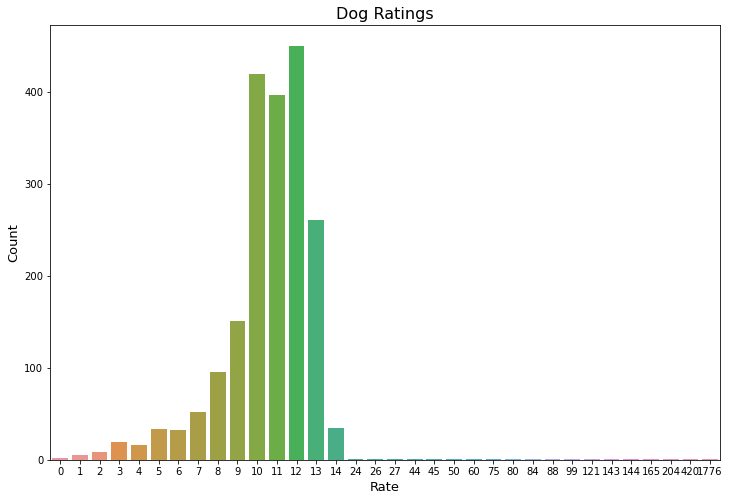

In [86]:
# plot figure size
fig = plt.figure(figsize = (12, 8))

# plot countplot
sns.countplot(x ='rating_numerator', data = twitter_archive_master)
plt.title('Dog Ratings', fontsize = 16)
plt.xlabel('Rate', fontsize = 13)
plt.ylabel('Count', fontsize = 13) 

# Show the plot
plt.show()

##### Observation(s)

1. Rating 12/10 and 10/10 was given to over 400 dogs.
2. 14/10 has the highest frequency of rating given to dogs by @WeRateDogs.

#### Visualizing Dog likes and retweets

In [87]:
# unique dog names.

twitter_archive_master.dog_name.nunique

<bound method IndexOpsMixin.nunique of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
1989        None
1990           a
1991           a
1992           a
1993        None
Name: dog_name, Length: 1994, dtype: object>

##### Creating a DataFrame that consists of text, dog names, tweet likes and retweets.

In [88]:
# create a dataframe that contains text, dog names, tweet likes and retweets columns.

tweet_info = pd.DataFrame(twitter_archive_master,columns=['text','dog_name','likes','retweets'])

tweet_info

,text,dog_name,likes,retweets
0,This is Phineas. He's a mystical boy. Only eve...,Phineas,39467,8853
1,This is Tilly. She's just checking pup on you....,Tilly,33819,6514
2,This is Archie. He is a rare Norwegian Pouncin...,Archie,25461,4328
3,This is Darla. She commenced a snooze mid meal...,Darla,42908,8964
4,This is Franklin. He would like you to stop ca...,Franklin,41048,9774
...,...,...,...,...
1989,Here we have a 1949 1st generation vulpix. Enj...,None,111,41
1990,This is a purebred Piers Morgan. Loves to Netf...,a,311,147
1991,Here is a very happy pup. Big fan of well-main...,a,128,47
1992,This is a western brown Mitsubishi terrier. Up...,a,132,48


In [89]:
# group tweet_info dataframe by 'dog_name'. 

tweet_info = tweet_info.groupby('dog_name').sum().reset_index()

##### Creating a DataFrame showing the first five rows of dog names with the least number of likes.

In [90]:
# dataframe for least number of likes.

like_info = tweet_info.sort_values('likes', axis=0, ascending = True).head()

like_info

,dog_name,likes,retweets
181,Christoper,196,51
447,Kallie,211,45
316,Fwed,211,60
458,Keet,227,57
535,Lugan,244,71


##### Creating a DataFrame showing the five rows of dog names with the least number of retweetss.

In [91]:
# dataframe for least number of retweets.

retweet_info = tweet_info.sort_values('retweets', axis=0, ascending= True).head()

# display dataframe
retweet_info

,dog_name,likes,retweets
92,Bloo,267,45
447,Kallie,211,45
181,Christoper,196,51
458,Keet,227,57
316,Fwed,211,60


##### Visualizing Five Names of Dogs with the Least Number of Retweets.

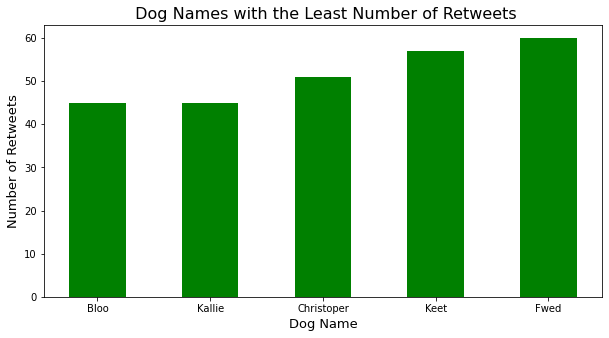

In [92]:
fig = plt.figure(figsize = (10, 5))

#  plot Bar plot
plt.bar(retweet_info.dog_name, retweet_info.retweets, color ='green',width = 0.5)
plt.xlabel("Dog Name", fontsize = 13)
plt.ylabel("Number of Retweets", fontsize = 13)
plt.title(" Dog Names with the Least Number of Retweets", fontsize = 16)

# show plot
plt.show()

##### Observation(s)

1. WeRateDogs tweet about Bloo and Kallie had the least number of retweet (45 retweets)

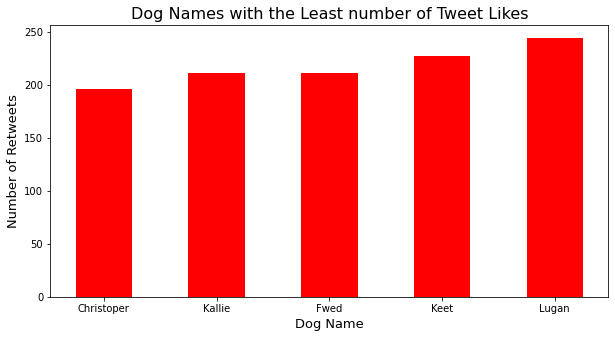

In [93]:
# plot size
fig = plt.figure(figsize = (10, 5))
# create Bar plot
plt.bar(like_info.dog_name, like_info.likes, color ='red', width = 0.5)
plt.xlabel("Dog Name", fontsize = 13)
plt.ylabel("Number of Retweets", fontsize = 13)
plt.title("Dog Names with the Least number of Tweet Likes", fontsize = 16)

# show  plot
plt.show()

##### Observation(s)

1. WeRateDogs tweet about Christopher had the least number of likes (196 likes)

#### Visualizing the relationship between retweets and likes of WeRateDogs Tweets Using Seaborn Regression Plot

Text(0, 0.5, 'Number of Likes')

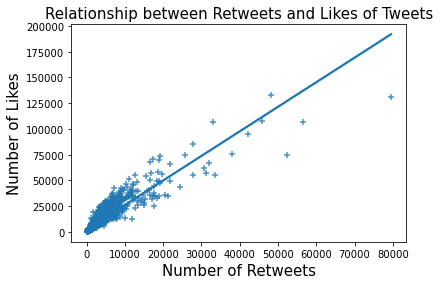

In [94]:
# create regression plot.

sns.regplot(twitter_archive_master.retweets, twitter_archive_master.likes, ci=None, marker = '+')
plt.title('Relationship between Retweets and Likes of Tweets', size=15)
plt.xlabel('Number of Retweets', size= 15)
plt.ylabel('Number of Likes', size= 15)

##### Observation(s)

1. There is an outlier in the plot.
2. The chart shows a positive correlation between Retweets and Likes of WeRateDogs Tweets.
3. The higher the number of retweets, the higher the number of likes.

#### Visualizing Dog Breed Prediction

In [95]:
# display the first five rows of twitter_archive_master table

twitter_archive_master.head()

,tweet_id,tweet_time,text,dog_name,retweets,likes,tweet_source,rating_numerator,rating_denominator,prediction_1,p1_dog,prediction_2,p2_dog,prediction_3,p3_dog,dog_stage,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,8853,39467,Twitter for Iphone,13,10,Orange,False,Bagel,False,Banana,False,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,6514,33819,Twitter for Iphone,13,10,Chihuahua,True,Pekinese,True,Papillon,True,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,4328,25461,Twitter for Iphone,12,10,Chihuahua,True,Malamute,True,Kelpie,True,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,8964,42908,Twitter for Iphone,13,10,Paper_Towel,False,Labrador_Retriever,True,Spatula,False,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,9774,41048,Twitter for Iphone,12,10,Basset,True,English_Springer,True,German_Short-Haired_Pointer,True,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


####  Visualizing dog breed first prediction

In [96]:
# creating dataframe for first prediction of dog breed (10 rows).

prediction_1 = twitter_archive_master.groupby('prediction_1').size().reset_index(name="no_of_predictions").sort_values("no_of_predictions", axis = 0, ascending = False).head(10)

# display dataframe
prediction_1

,prediction_1,no_of_predictions
137,Golden_Retriever,139
183,Labrador_Retriever,95
246,Pembroke,88
77,Chihuahua,79
261,Pug,54
80,Chow,41
278,Samoyed,40
255,Pomeranian,38
339,Toy_Poodle,38
205,Malamute,29


In [97]:
# number of unique values in prediction_1 column.
twitter_archive_master.prediction_1.nunique()

374

##### Top ten first dog breed prediction

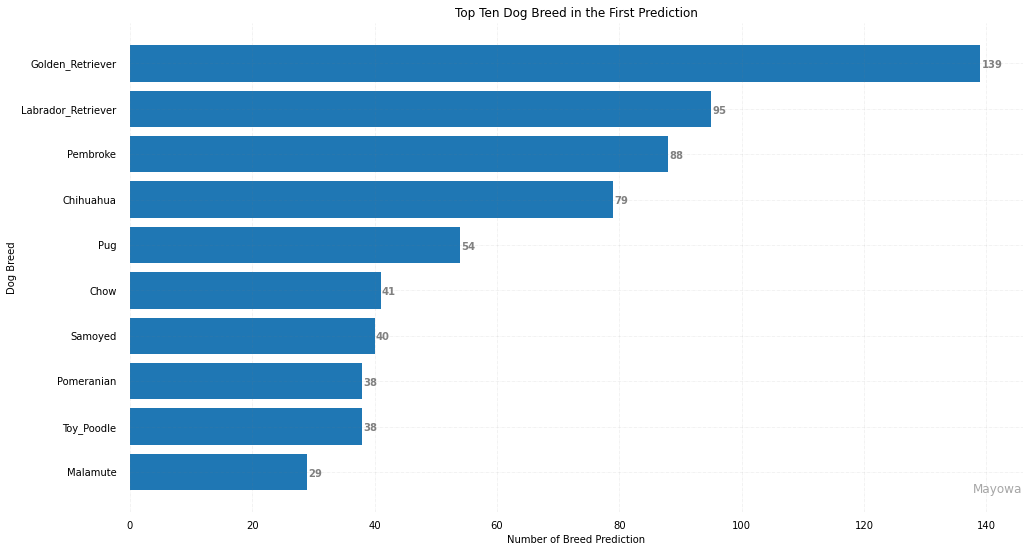

In [98]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(prediction_1.prediction_1, prediction_1.no_of_predictions)

plt.xlabel('Number of Breed Prediction')
plt.ylabel('Dog Breed')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top Ten Dog Breed in the First Prediction',
             loc ='center', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Mayowa', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

##### Observation(s)

1. The highest predicted dog breed in the first prediction was Golden Retriever.
2. The top three predicted dog breeds were Golden Retriever (139), Labrador Retriever (95), Pembroke (88),  Pug (54), Chow (41).

#### Visualizing dog breed second prediction

In [99]:
# creating dataframe for second prediction of dog breed (10 rows).

prediction_2 = twitter_archive_master.groupby('prediction_2').size().reset_index(name="no_of_predictions").sort_values("no_of_predictions", axis = 0, ascending = False).head(10)

prediction_2

,prediction_2,no_of_predictions
194,Labrador_Retriever,96
142,Golden_Retriever,82
71,Cardigan,73
77,Chihuahua,43
76,Chesapeake_Bay_Retriever,40
133,French_Bulldog,39
265,Pomeranian,39
365,Toy_Poodle,36
314,Siberian_Husky,33
85,Cocker_Spaniel,32


In [100]:
# unique values 

twitter_archive_master.prediction_2.nunique()

400

##### Top ten second dog breed prediction

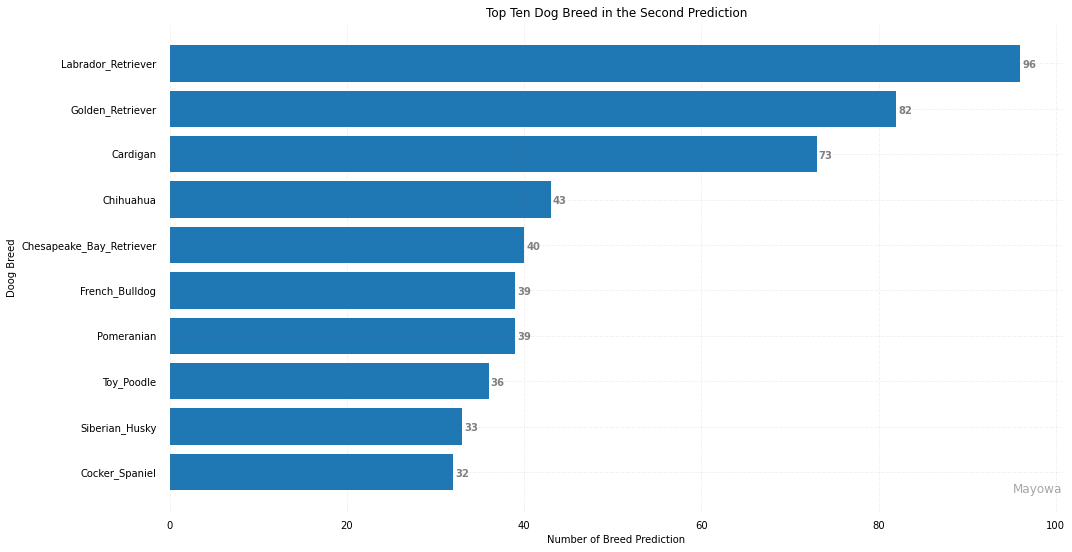

In [101]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(prediction_2.prediction_2, prediction_2.no_of_predictions)

plt.xlabel('Number of Breed Prediction')
plt.ylabel('Doog Breed')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top Ten Dog Breed in the Second Prediction',
             loc ='center', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Mayowa', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

##### Observation(s)

1. The highest predicted dog breed in the second prediction was Labrador Retriever.
2. The top three predicted dogs breeds were Labrador Retriever (96), Golden Retriever (82), Cardigan (72), Chihuahua (43), Chasapeake Bay Retriever (40).

#### Visualizing dog breed third prediction

In [102]:
# creating dataframe for third prediction of dog breed (10 rows).

prediction_3 = twitter_archive_master.groupby('prediction_3').size().reset_index(name="no_of_predictions").sort_values("no_of_predictions", axis = 0, ascending = False).head(10)

prediction_3

,prediction_3,no_of_predictions
202,Labrador_Retriever,76
88,Chihuahua,57
151,Golden_Retriever,46
134,Eskimo_Dog,36
195,Kelpie,33
91,Chow,31
201,Kuvasz,31
36,Beagle,30
341,Staffordshire_Bullterrier,30
96,Cocker_Spaniel,29


In [103]:
twitter_archive_master.prediction_3.nunique()

405

##### Top ten third dog breed prediction

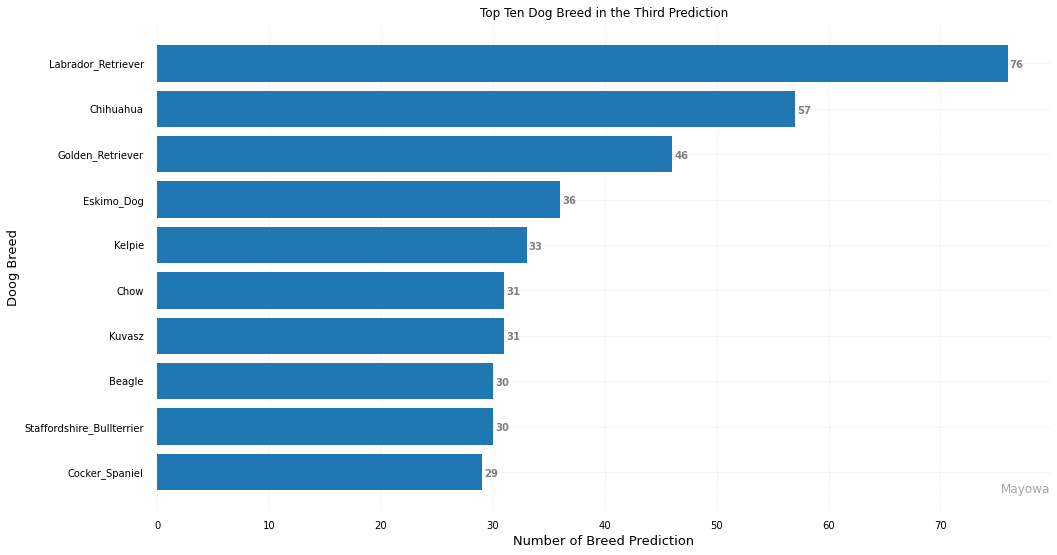

In [104]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(prediction_3.prediction_3, prediction_3.no_of_predictions)

plt.xlabel('Number of Breed Prediction', fontsize = 13)
plt.ylabel('Doog Breed', fontsize = 13)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top Ten Dog Breed in the Third Prediction',
             loc ='center', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Mayowa', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

##### Observation(s)

1. The highest predicted dog breed in the third prediction was Labrador Retriever.
2. The top three predicted dog breeds was Labrador Retriever (76), Chihuahua (57), Golden Retriever (46), Eskimo Dog (36), Kelpie (33)..

### Reference Materials


* Stackoverflow - 
    How to merge datasets in pandas (https://stackoverflow.com/questions/49224355/how-to-merge-3-dataset-in-pandas).
    
    How to store data in a csv file (https://stackoverflow.com/questions/36975326/how-to-store-data-in-csv-file).
    
    How to remove url from a column in pandas dataframe (https://stackoverflow.com/questions/51994254/removing-url-from-a-column-in-pandas-dataframe/51994437#51994437)
    
    
* GitHub - 
    How to merge datasets (https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/04-Pandas-Merge-Datasets.html#:~:text=If%20two%20datasets%20share%20at%20least%20one%20column,and%20the%20shared%20column%20to%20be%20merged%20on)


* GeeksforFeeks - 
    Plotting barplotts (https://www.geeksforgeeks.org/bar-plot-in-matplotlib/)


* Seaborn
    Ploting regression plot (https://seaborn.pydata.org/generated/seaborn.regplot.html)
    
    
* Spark by {Example} - 
    How to replace blank values with nan (https://sparkbyexamples.com/pandas/pandas-replace-blank-values-with-nan/#:~:text=Using%20replace%20%28%29%20method%20you%20can%20also%20replace,replace%20%28%27%27%2C%20np.%20nan%2C%20regex%20%3D%20True%29%20print%28df2%29)
    